In [88]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
city_data
ride_data = pd.read_csv("data/ride_data.csv")
ride_data
# Combine the data into a single dataset
merge_table = pd.merge(city_data, ride_data, on = 'city')
merge_table = merge_table.drop_duplicates('city', keep = 'first')
# Display the data table for preview
merge_table.head(10)


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
28,Williamsstad,59,Urban,2018-01-23 17:51:24,19.62,125986195523
51,Port Angela,67,Urban,2018-04-17 06:23:18,16.34,7120534266772
70,Rodneyfort,34,Urban,2018-02-10 23:22:03,23.44,5149245426178
93,West Robert,39,Urban,2018-02-15 04:21:47,12.28,1442502460354
124,West Anthony,70,Urban,2018-03-06 02:27:01,10.02,9396763280782
154,West Angela,48,Urban,2018-01-12 01:45:27,26.86,4820052223501
193,Martinezhaven,25,Urban,2018-03-19 15:31:26,5.30,264337981979
217,Karenberg,22,Urban,2018-03-11 17:26:12,36.15,7796761531541
234,Barajasview,26,Urban,2018-01-15 02:59:07,19.52,8268107272481


In [89]:
organized_df = merge_table[["city","date","fare","ride_id","driver_count","type"]]
organized_df.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
28,Williamsstad,2018-01-23 17:51:24,19.62,125986195523,59,Urban
51,Port Angela,2018-04-17 06:23:18,16.34,7120534266772,67,Urban
70,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
93,West Robert,2018-02-15 04:21:47,12.28,1442502460354,39,Urban


In [90]:
merge_table.columns

Index(['city', 'driver_count', 'type', 'date', 'fare', 'ride_id'], dtype='object')

In [91]:
u_s_r = merge_table["type"].value_counts()
u_s_r

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

## Bubble Plot of Ride Sharing Data

In [92]:
urban_city = merge_table.loc[(merge_table["type"] == "Urban")]
suburban_city = merge_table.loc[(merge_table["type"] == "Suburban")]
rural_city = merge_table.loc[(merge_table["type"] == "Rural")]

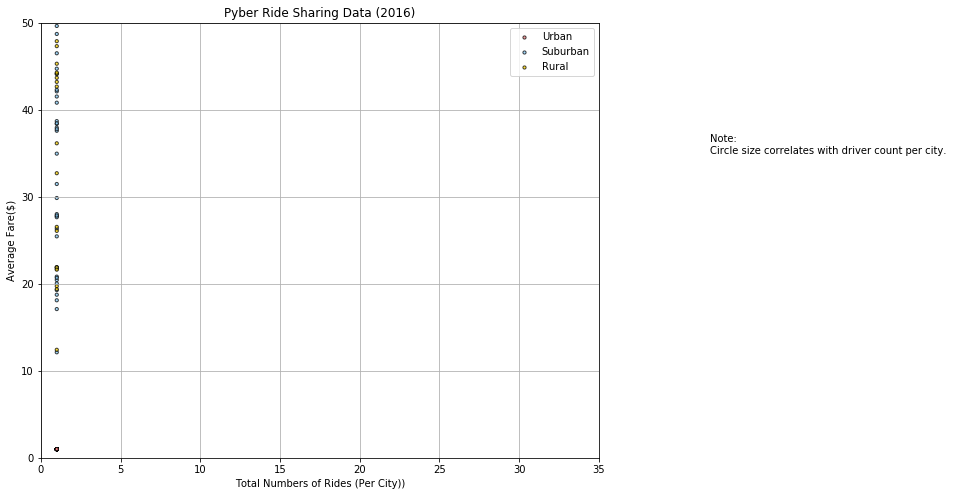

In [93]:
# Obtain the x and y coordinates for each of the three city types
avgerage_fare_urban = urban_city.groupby(['city'])['fare'].mean()
total_rides_urban = urban_city.groupby(['city']).count()['ride_id']
total_drivers_urban = urban_city.groupby(['city'])['driver_count'].value_counts()

avgerage_fare_suburban = suburban_city.groupby(['city'])['fare'].mean()
total_rides_suburban = suburban_city.groupby(['city']).count()['ride_id']
total_drivers_suburban = suburban_city.groupby(['city'])['driver_count'].value_counts()

avgerage_fare_rural = rural_city.groupby(['city'])['fare'].mean()
total_rides_rural = rural_city.groupby(['city']).count()['ride_id']
total_drivers_rural = rural_city.groupby(['city'])['driver_count'].value_counts()
# Build the scatter plots for each city types Incorporate the other graph properties i just put them together 
fig = plt.figure(figsize=(10,8))
plt.grid(True)

urban_scatter = plt.scatter(total_rides_urban, total_rides_urban,s=total_drivers_urban*10,
            marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.75, label="Urban")

suburban_scatter = plt.scatter(total_rides_suburban, avgerage_fare_suburban,s=total_drivers_suburban*10,
            marker ='o', facecolors ="lightskyblue", edgecolors='black',alpha = 0.75, label="Suburban")

rural_scatter = plt.scatter(total_rides_rural, avgerage_fare_rural,s=total_drivers_rural*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.75, label="Rural")


# Create a legend
lgnd = plt.legend(handles=[urban_scatter,suburban_scatter,rural_scatter],loc="best")
lgnd.legendHandles[0]._sizes = [90]
lgnd.legendHandles[1]._sizes = [90]
lgnd.legendHandles[2]._sizes = [90] 

#it keeps giving me an erro saying Image size of 1321632x278 pixels is too large. It must be less than 2^16 in each direction
plt.xlim(0,35)
plt.ylim(0,50)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Numbers of Rides (Per City))")
plt.ylabel("Average Fare($)")
plt.legend(loc='upper right')
# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)
# Save Figure
plt.savefig("Images/PyberRideSharingData.png", bbox_inches="tight")

#this for some reason is what i'm getting i've tried fixing it but this is the furthest i got with it

In [83]:
# Show plot
plt.show()

## Total Fares by City Type

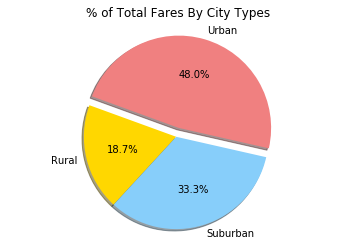

In [99]:
# Calculate Type Percents
total_fare = merge_table.groupby(['type'])['fare'].sum()
# Labels for the pie chart
labels = ["Rural","Suburban","Urban" ]
# Build Pie Chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("percent of Total Fares By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")
# Save Figure
plt.savefig("Images/percent of Total Fares By City Types.png")
plt.show()


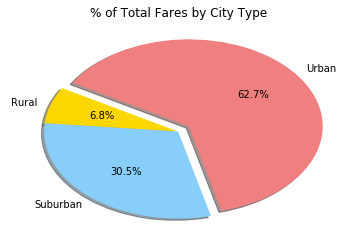

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

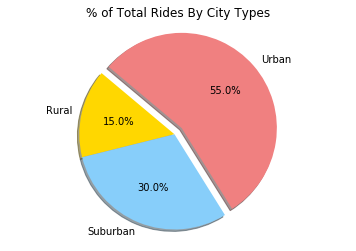

In [101]:
# Calculate Ride Percents
total_rides = merge_table.groupby(['type'])['ride_id'].count()

labels = ["Rural","Suburban","Urban" ]

# Build Pie Chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("percent of Total Rides By City Types")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

# Save Figure
plt.savefig("Images/percent of Total Rides By City Types.png")
plt.show()

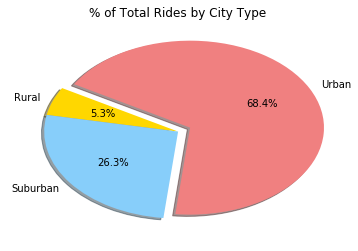

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

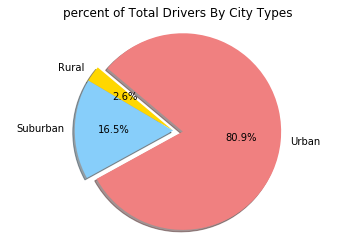

In [103]:
# Calculate Driver Percents
total_drivers = city_data.groupby(['type'])['driver_count'].sum()

labels = ["Rural","Suburban","Urban" ]

# Build Pie Charts
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("percent of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

# Save Figure
plt.savefig("Images/percent of Total Drivers By City Types.png")
plt.show()

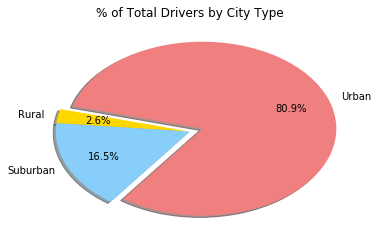

In [6]:
# Show Figure
plt.show()